Try out different clustering models in the given dataset. Find the optimum number of clusters in each model and create the model with optimum number of clusters. Also learn about dB scan clustering and implement it.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')


#For clustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

#For evaluation
from sklearn import metrics
from itertools import product
from sklearn.metrics import silhouette_score
#For Scaling
from sklearn.preprocessing import StandardScaler


#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

### Load dataset to python environment

In [2]:
data=pd.read_csv('Wine_clust.csv')

### Descriptive analysis

In [3]:
#Check data accuracy using head and tail function
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


Data looks fine.

In [5]:
#Checking dimensions
data.shape

(178, 13)

178 rows and 13 columns.

In [6]:
#Checking columns
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

These features are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the types of wines.

In [7]:
#Checking  statistical summary
pd.set_option('display.max_columns', None)
data.describe().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


No missing values as count remains same for all features.But the data needs scaling to be done as we can see wide difference in the range of values in features especially for Magnesium and Proline.

In [8]:
#Lets check the datatype of each features
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

Data types of all  features has been inferred as either float64 or int64 .So there is no need for any convertion.

In [9]:
#Checking the percentage of  null values in each columns
data.isnull().sum()/data.shape[0]*100

Alcohol                 0.0
Malic_Acid              0.0
Ash                     0.0
Ash_Alcanity            0.0
Magnesium               0.0
Total_Phenols           0.0
Flavanoids              0.0
Nonflavanoid_Phenols    0.0
Proanthocyanins         0.0
Color_Intensity         0.0
Hue                     0.0
OD280                   0.0
Proline                 0.0
dtype: float64

Dataset looks clean without any missing values.

In [10]:
#Checking for any duplicates
data.duplicated().sum()

0

No duplicates found

## Exploratory data analysis and further preprocessing.

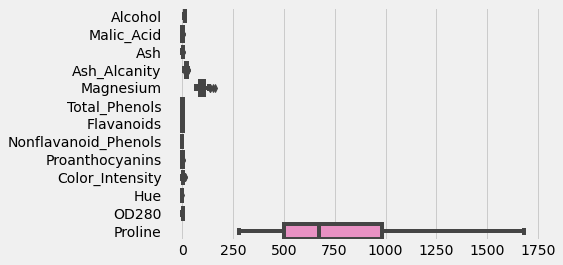

In [11]:
#Lets check for any Outliers in dataset using Boxplot
sns.boxplot(data= data, orient='h')
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'Alcohol'),
  Text(2, 0, 'Malic_Acid'),
  Text(3, 0, 'Ash'),
  Text(4, 0, 'Ash_Alcanity'),
  Text(5, 0, 'Magnesium'),
  Text(6, 0, 'Total_Phenols'),
  Text(7, 0, 'Flavanoids'),
  Text(8, 0, 'Nonflavanoid_Phenols'),
  Text(9, 0, 'Proanthocyanins'),
  Text(10, 0, 'Color_Intensity'),
  Text(11, 0, 'Hue'),
  Text(12, 0, 'OD280'),
  Text(13, 0, 'Proline')])

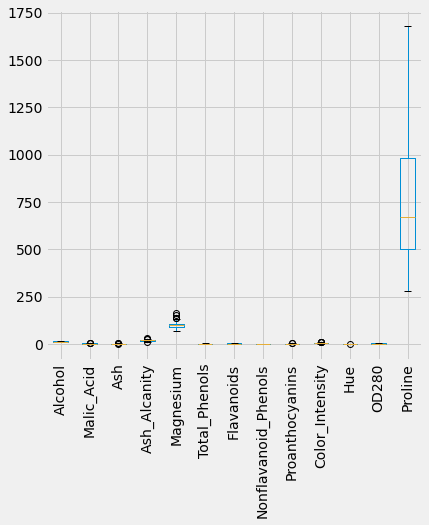

In [12]:
plt.figure(figsize=(6, 6))
data.boxplot()
plt.xticks(rotation=90) 

Outliers present in Malic_Acid,Ash,Ash_Alcanity,Magnesium,Proanthocyanins,Color_Intensity and Hue.

In [13]:
#We can handle those by using quantile method

out_cols=['Malic_Acid','Ash','Ash_Alcanity','Magnesium','Proanthocyanins','Color_Intensity','Hue']


for out_cols in data:
    Q1 = np.percentile(data[out_cols],25,interpolation='midpoint')
    Q2 = np.percentile(data[out_cols],50,interpolation='midpoint')
    Q3 = np.percentile(data[out_cols],75,interpolation='midpoint')
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    out = pd.DataFrame()
    out['outlier'] = data[(data[out_cols]<low_limit) | (data[out_cols]>upper_limit)][out_cols]
    ind1= (data[out_cols]<low_limit) | (data[out_cols]>upper_limit)

    data.drop(data.loc[ind1].index,inplace=True)

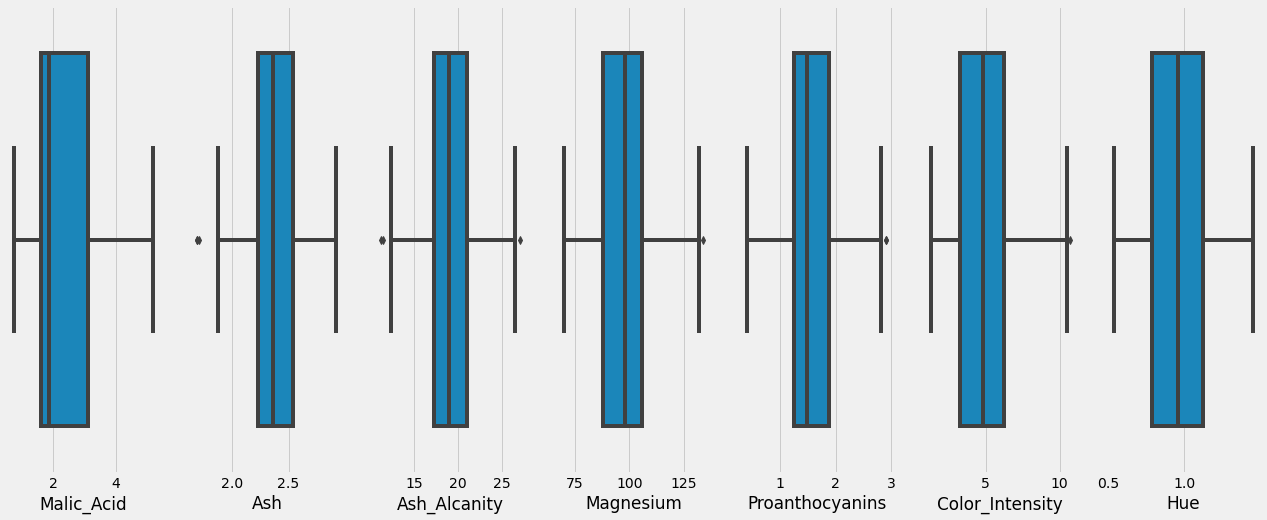

In [14]:
fig=plt.subplots(figsize=(20,8))     
plt.subplot(1,7,1)
sns.boxplot(data['Malic_Acid'],data=data)
plt.subplot(1,7,2)
sns.boxplot(data['Ash'],data=data)
plt.subplot(1,7,3)
sns.boxplot(data['Ash_Alcanity'],data=data)
plt.subplot(1,7,4)
sns.boxplot(data['Magnesium'])
plt.subplot(1,7,5)
sns.boxplot(data['Proanthocyanins'])
plt.subplot(1,7,6)
sns.boxplot(data['Color_Intensity'])
plt.subplot(1,7,7)
sns.boxplot(data['Hue'])
plt.show()

Data is almost clean from outliers.

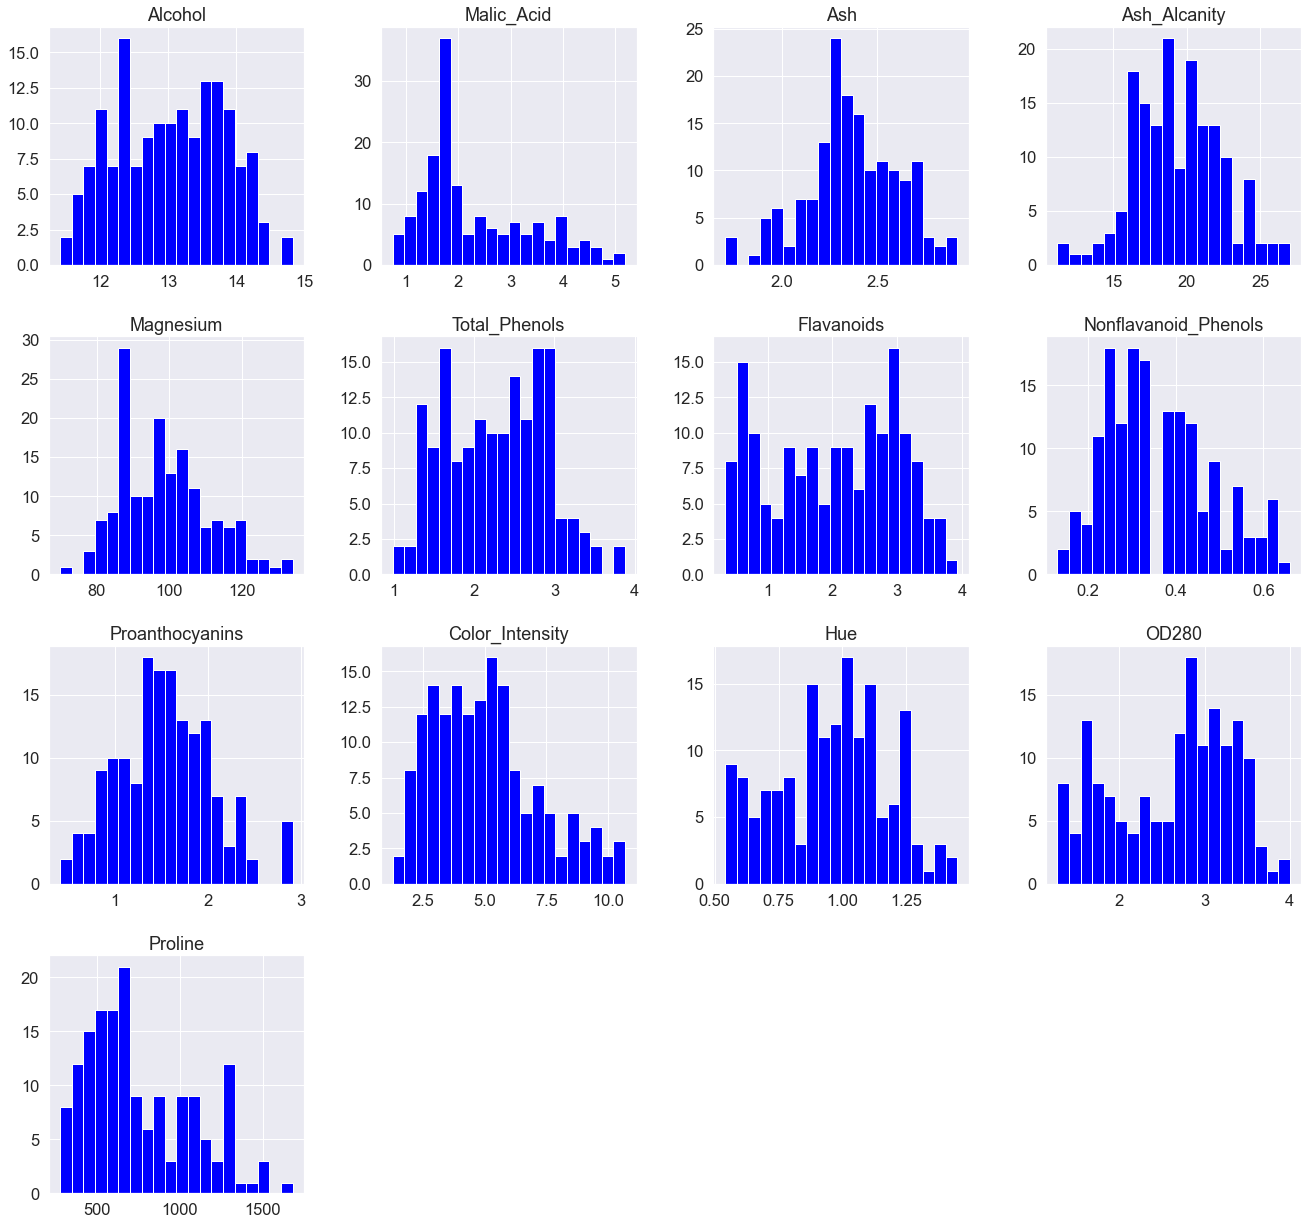

In [15]:
#Checking the distribution of each features
sns.set(style="darkgrid", font_scale=1.5, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20, color="blue")

In [16]:
col=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

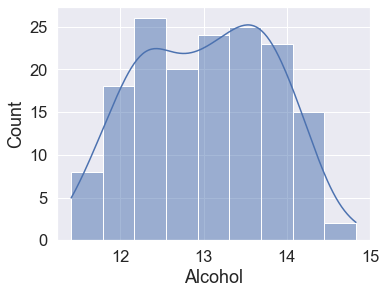

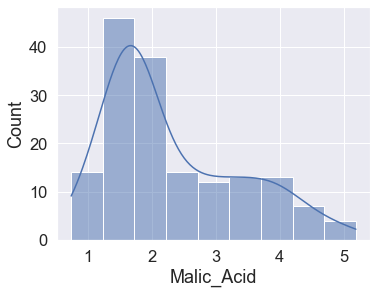

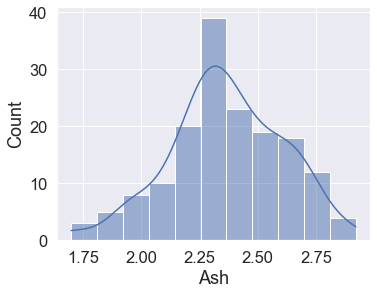

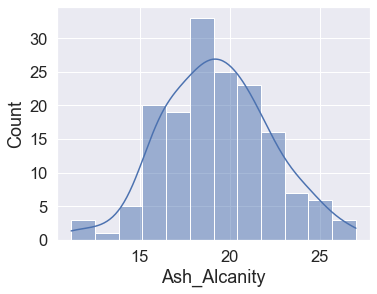

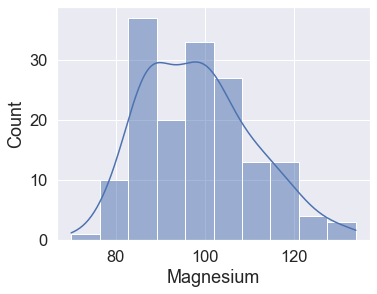

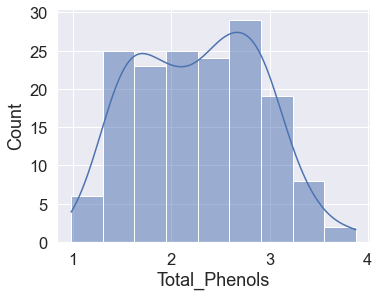

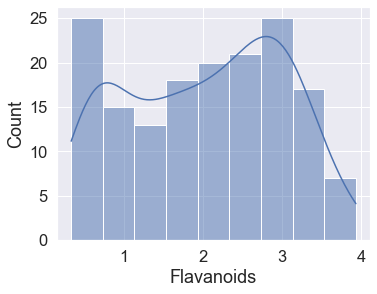

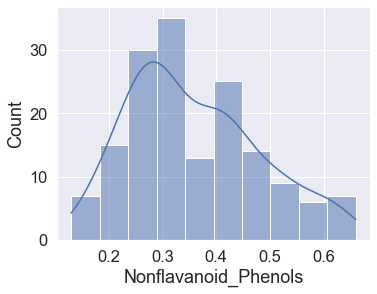

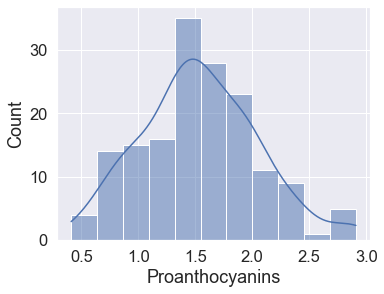

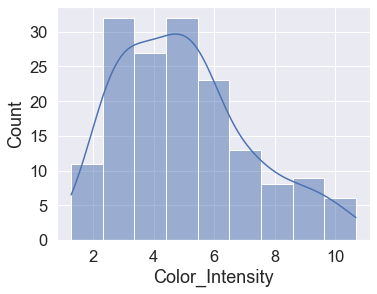

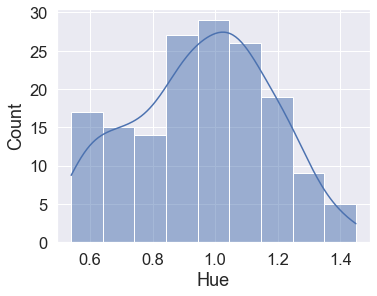

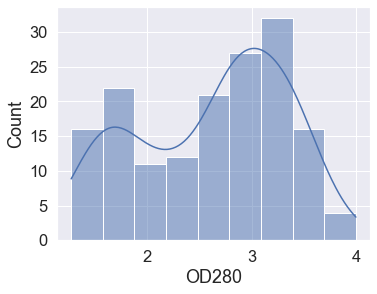

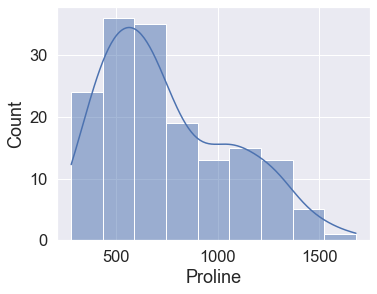

In [17]:
for col in data.columns:
    fig, axs = plt.subplots(figsize=(5, 4))
    sns.histplot(data=data, x=col, kde=True, ax=axs)
    plt.show()

Distributions require scaling and standardization.

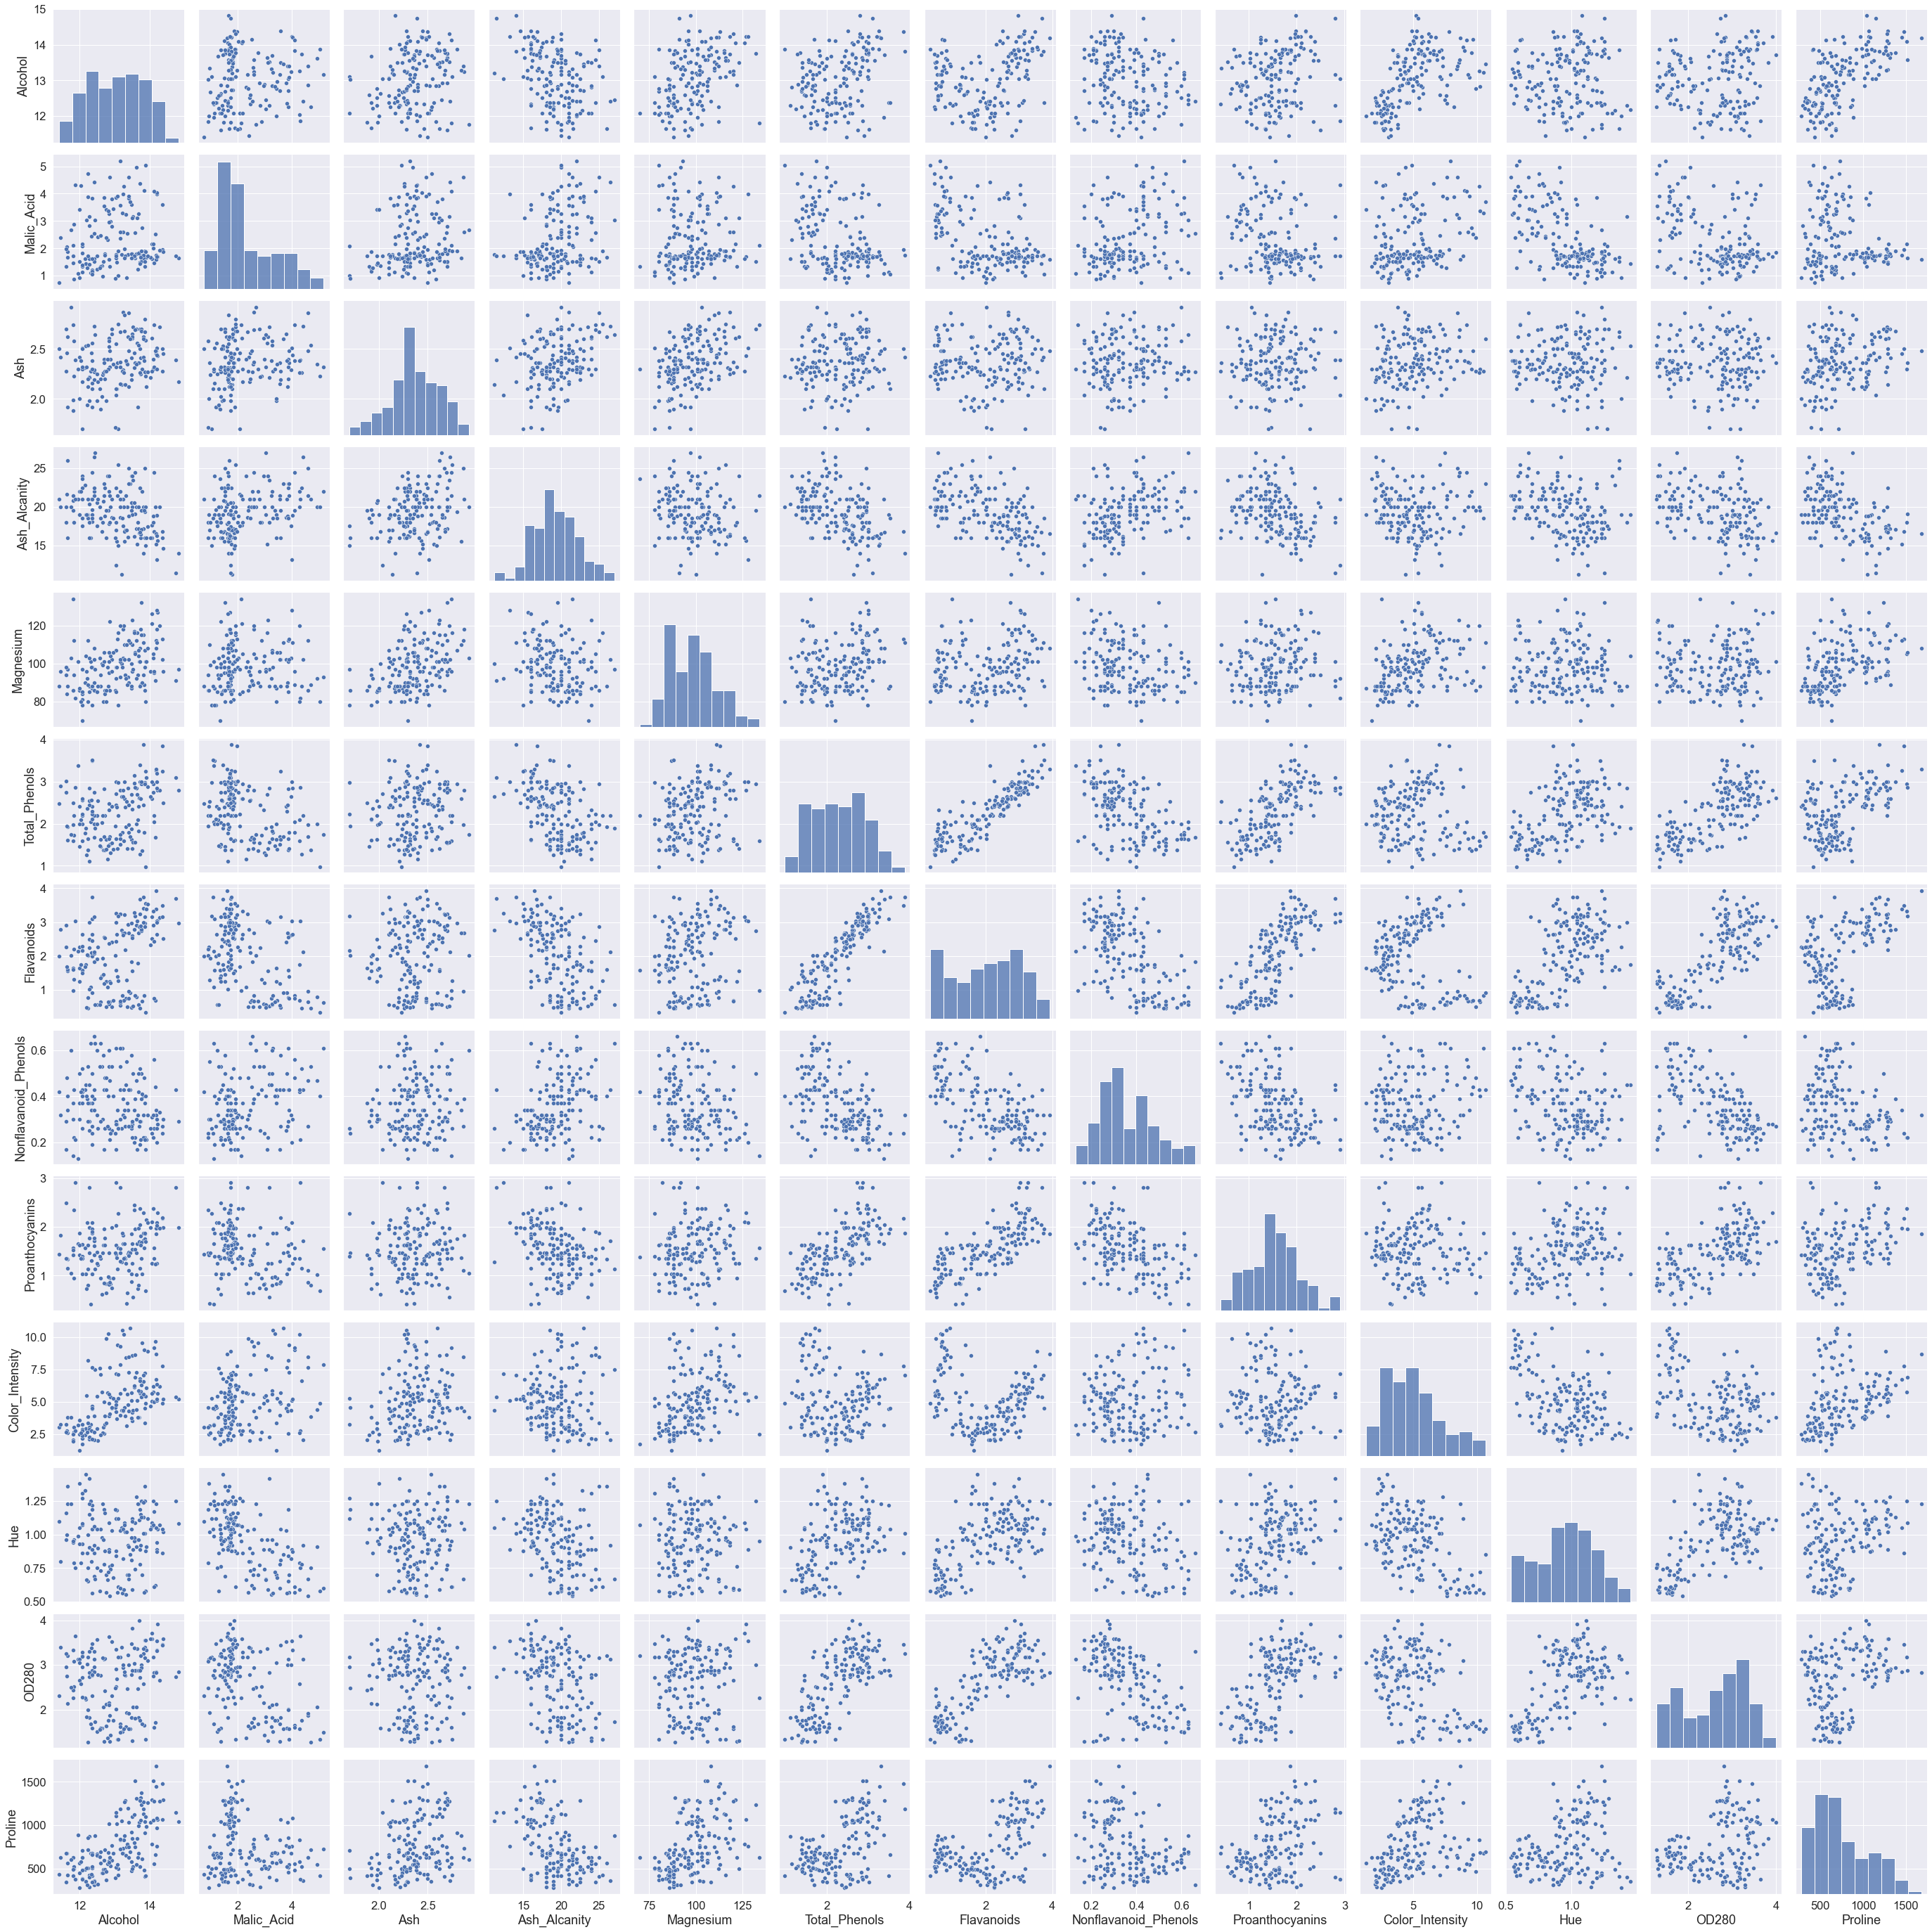

In [18]:
#Pairplot visualization of  given data to find the relationship between variables 
#and it provides a high-level interface for drawing attractive and informative statistical graphics.
sns.pairplot(data, size=3)

The pairplot above shows us that there are no clear clusters at a first glance. We are looking for clusters, so this will require us to transform the data. PCA can be considered for feature reduction and better visualization of cluster formation.

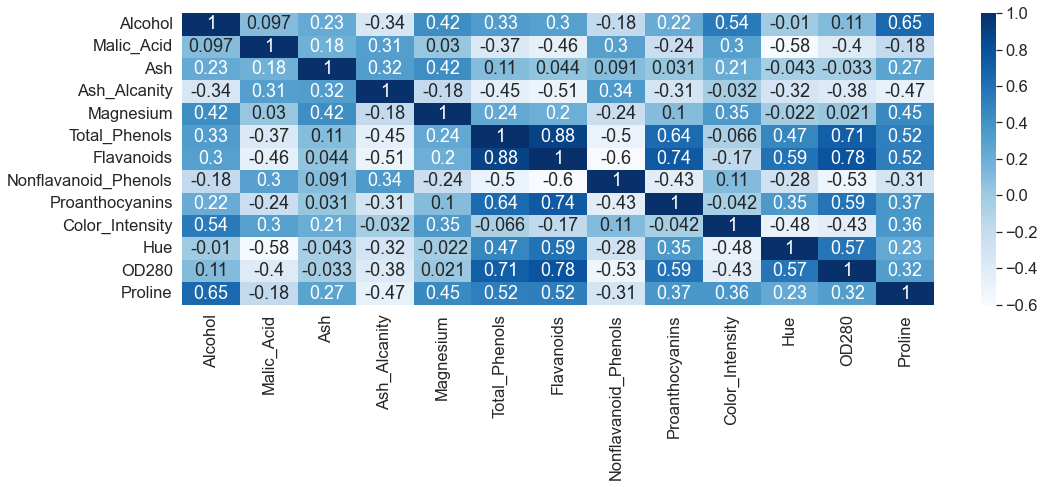

In [19]:
#Checking the correlation of features
corrmatrix=data.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(corrmatrix,vmin=-0.6, vmax= 1,annot=True,cmap='Blues')
plt.show()

In [20]:
#Lowest correlation= -0.6 (Flavanoids  & Nonflavanoid-Phenols)
#Highest correlation=0.88 (Flavanoids & Total_Phenols)

## Scaling using Standardization

As we have already seen that the distribution and range of values in features need scaling to be done and also as clustering is mainly based on distance scaling is very important to move forward for good clustering.

In [21]:
sc = StandardScaler()
scaled_data = sc.fit_transform(data)
scaled_data

array([[ 1.51516332, -0.57916566,  0.27093638, ...,  0.3833328 ,
         1.82809675,  0.98217445],
       [ 0.20964771, -0.51250719, -0.93153695, ...,  0.42947949,
         1.09692792,  0.93483012],
       [ 0.15894808,  0.03980581,  1.26608672, ...,  0.33718612,
         0.77352632,  1.36092915],
       ...,
       [ 0.29837208,  1.8681523 , -0.43396178, ..., -1.69326819,
        -1.49028487,  0.25622795],
       [ 0.17162299,  0.25882648,  0.02214879, ..., -1.6471215 ,
        -1.40591924,  0.27200939],
       [ 1.38841423,  1.69674482,  1.5563389 , ..., -1.60097481,
        -1.43404112, -0.61175157]])

In [22]:
type(scaled_data)

numpy.ndarray

In [23]:
#Now the data is scaled and in array.

# Different Clustering Models

## 1 Centroid based method- K – Means algorithm

KMeans algorithm has an important factor which is chosing k groups or clusters of similarity.To calculate that similarity, we will use the euclidean distance as measurement.
To choose the optimum K we use Elbow method.Elbow method uses WCSS(within the clusters sum of squares)

Text(0.5, 1.0, 'Alcohol & Malic_Acid before Clustering')

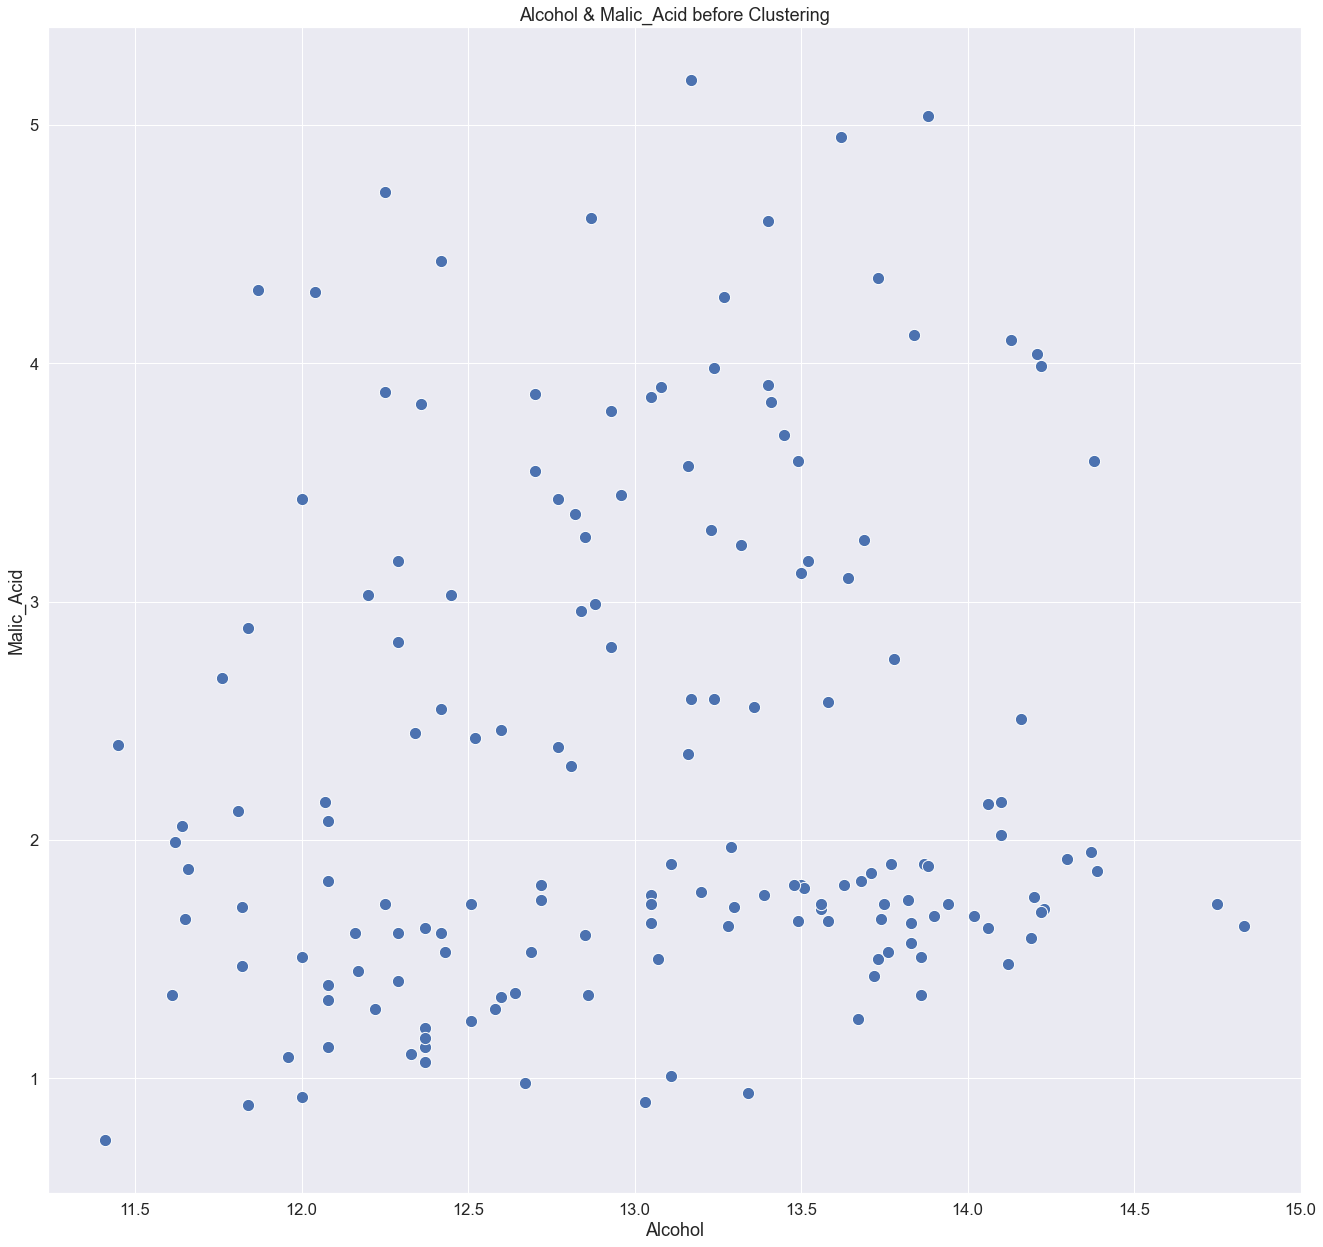

In [24]:
#Before clustering
ax= sns.scatterplot(data=data,x='Alcohol', y='Malic_Acid',s=150)
plt.title('Alcohol & Malic_Acid before Clustering')

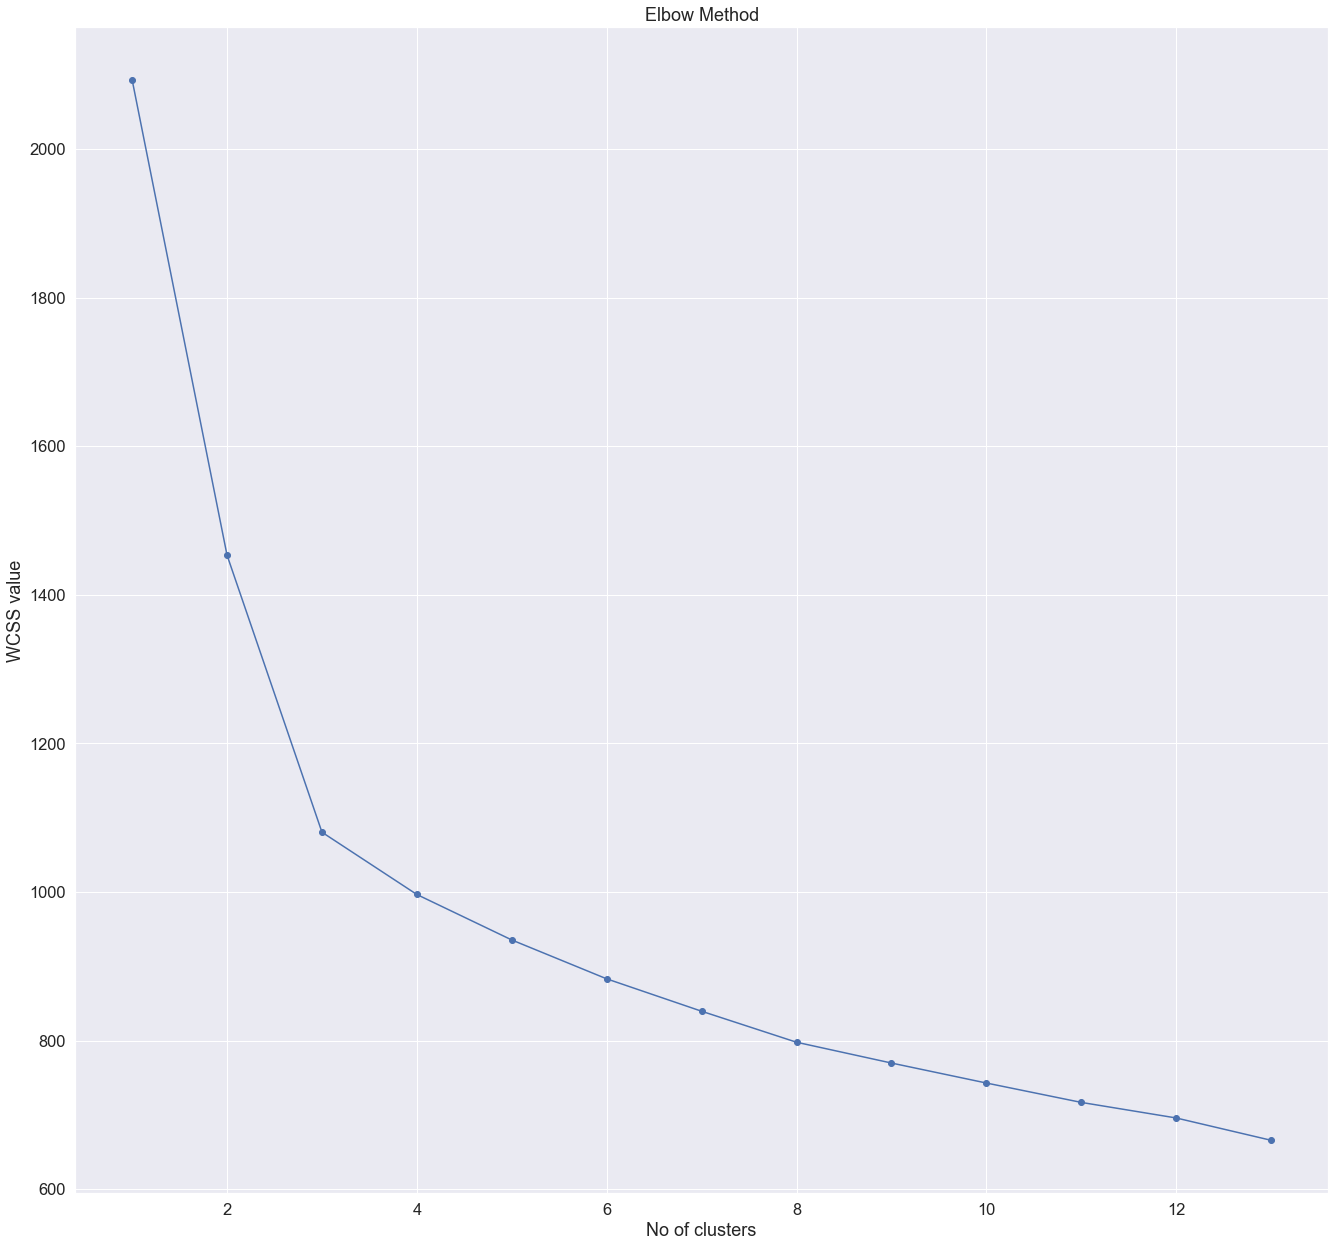

In [25]:
#Elbow method-to find optimal value of k
#Plotting WCSS v/s no of clusters

wcss=[]
for i in range(1,14):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,14),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS value')
plt.show()

Where there is gradual decrease in inertia is the optimal k .
WCSS reduces gradually at 3 in an Elbow kind of shape point.
Optimal value can be taken as 3 here.

In [26]:
#create the KMeans cluster with 3 clusters
#Lets us fit the model and predict clusters
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(scaled_data)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

We can see three clusters formed as 0,1,2

In [27]:
# The number of iterations taken to converge
kmeans.n_iter_

7

In [28]:
#Centroids
kmeans.cluster_centers_

array([[-0.96015895, -0.45028168, -0.43682141,  0.29927164, -0.60697184,
        -0.06283865,  0.04141528,  0.00250436,  0.04315225, -0.94144898,
         0.47928609,  0.28721177, -0.781647  ],
       [ 0.09364475,  0.92851635,  0.14564118,  0.59003002,  0.01205784,
        -1.01829457, -1.25446575,  0.73316896, -0.88073777,  0.90214474,
        -1.18465143, -1.30290758, -0.41983547],
       [ 0.90143089, -0.29114763,  0.32694995, -0.7806866 ,  0.60788958,
         0.88572266,  0.97023401, -0.59422851,  0.66686153,  0.229919  ,
         0.46833986,  0.7592187 ,  1.13417469]])

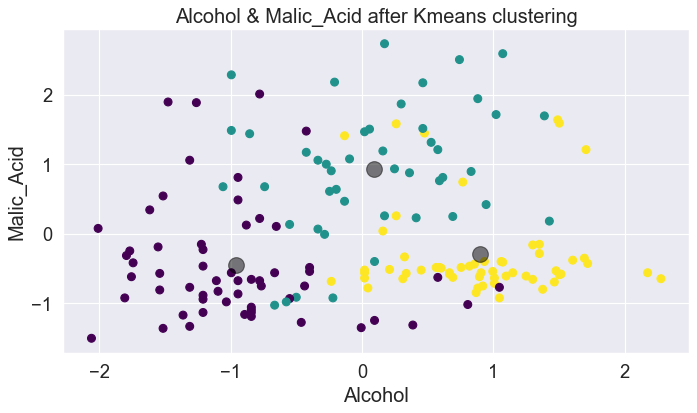

In [29]:
#Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers(centroids) as determined by the k-means estimator.
plt.figure(figsize=(9, 5), dpi=80)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('Alcohol & Malic_Acid after Kmeans clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')

centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);

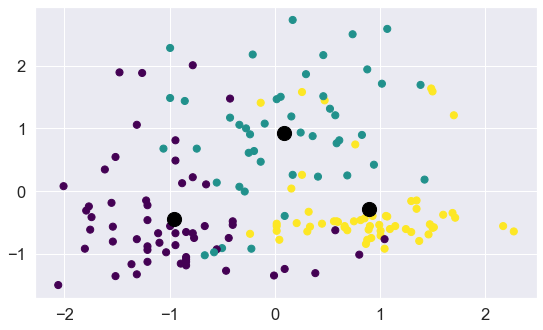

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1.0);

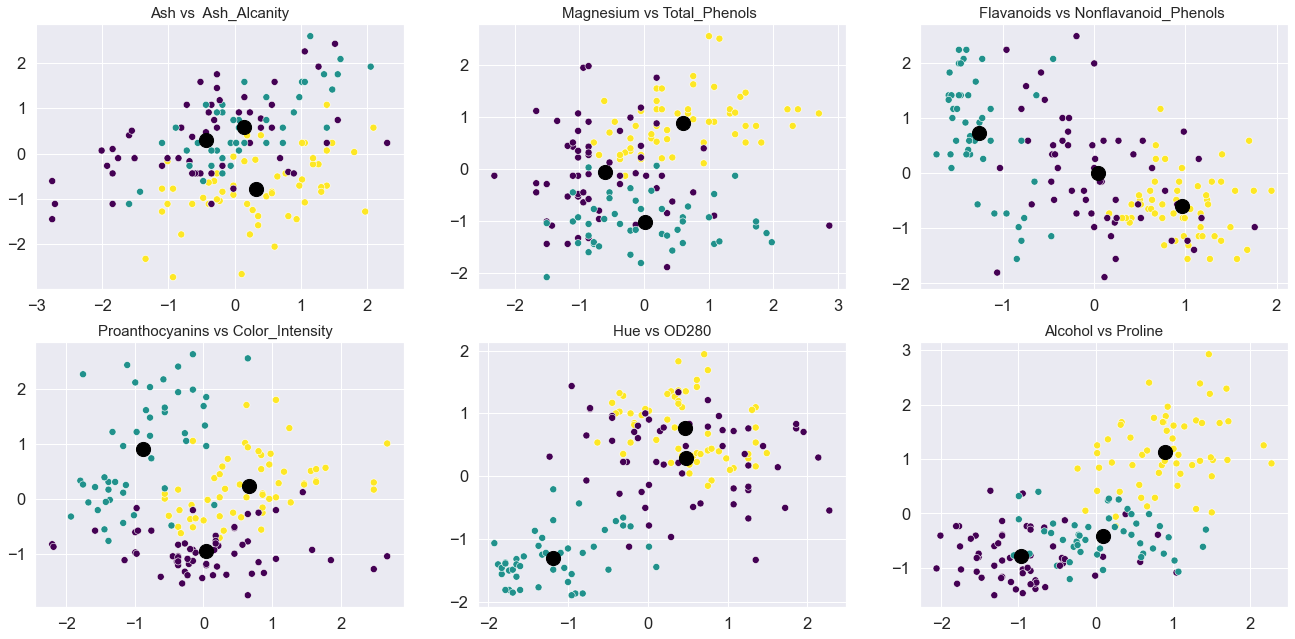

In [31]:
#Plotting all the features with their centroids
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.title('Ash vs  Ash_Alcanity',fontsize=15)
sns.scatterplot(scaled_data[:, 2], scaled_data[:, 3], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 2], centroids[:, 3], c='black', s=200, alpha=1.0);

plt.subplot(2,3,2)
plt.title('Magnesium vs Total_Phenols ',fontsize=15)
sns.scatterplot(scaled_data[:, 4], scaled_data[:, 5], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 4], centroids[:, 5], c='black', s=200, alpha=1.0);

plt.subplot(2,3,3)
plt.title('Flavanoids vs Nonflavanoid_Phenols ',fontsize=15)
sns.scatterplot(scaled_data[:, 6], scaled_data[:, 7], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 6], centroids[:, 7], c='black', s=200, alpha=1.0);

plt.subplot(2,3,4)
plt.title('Proanthocyanins vs Color_Intensity  ',fontsize=15)
sns.scatterplot(scaled_data[:, 8], scaled_data[:, 9], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 8], centroids[:, 9], c='black', s=200, alpha=1.0);

plt.subplot(2,3,5)
plt.title('Hue vs OD280',fontsize=15)
sns.scatterplot(scaled_data[:, 10], scaled_data[:, 11], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 10], centroids[:, 11], c='black', s=200, alpha=1.0);

plt.subplot(2,3,6)
plt.title('Alcohol vs Proline',fontsize=15)
sns.scatterplot(scaled_data[:, 0], scaled_data[:, 12], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 12], c='black', s=200, alpha=1.0);

### Validation Using Silhouette Score

The correct value of K can be chosen using the Silhouette method and Elbow method. The Silhouette method calculates the distance using the mean intra-cluster distance along with an average of the closest cluster distance for each data point. While the Elbow method uses the sum of squared data points and computes the average distance.

In [32]:
sil_km=silhouette_score(scaled_data,y_kmeans)
print(sil_km)

0.3013979201701521


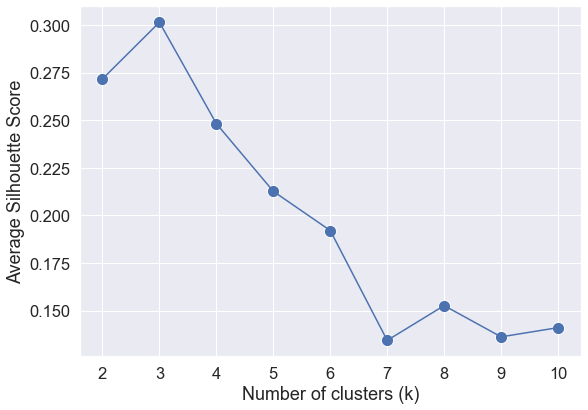

In [33]:
#For visual representation
silhouette= []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,n_init=25,random_state=123)
    kmeans.fit(scaled_data)
    silhouette.append(silhouette_score(scaled_data,kmeans.labels_))

silhouette_series =pd.Series(silhouette,index= range(2,11))    

plt.figure(figsize=(8,6))
ax=sns.lineplot(y= silhouette_series, x= silhouette_series.index)
ax=sns.scatterplot(y=silhouette_series,x= silhouette_series.index, s=150)
ax=ax.set(xlabel='Number of clusters (k)',ylabel='Average Silhouette Score')

We can see that at cluster 3 we got the highest score.

### Validation using Calinski Harabasz score

The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.

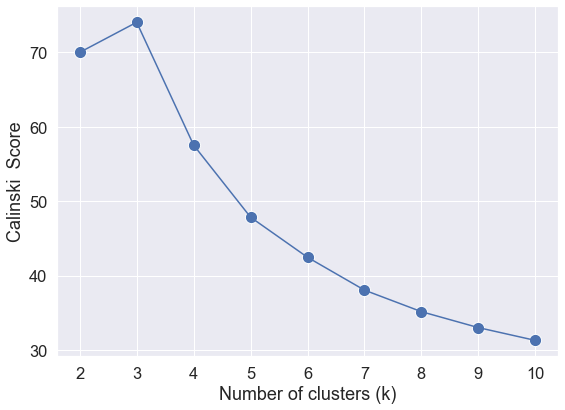

In [34]:
from sklearn.metrics import calinski_harabasz_score
calinski=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,n_init=25,random_state=1234)
    kmeans.fit(scaled_data)
    calinski.append(calinski_harabasz_score(scaled_data,kmeans.labels_))

calinski_series =pd.Series(calinski,index= range(2,11))
plt.figure(figsize=(8,6))
ax=sns.lineplot(y= calinski_series, x= calinski_series.index)
ax=sns.scatterplot(y=calinski_series,x= calinski_series.index, s=150)
ax=ax.set(xlabel='Number of clusters (k)',ylabel='Calinski  Score')

we can see at cluster 3 the score is good.

# 2.Connectivity based method- Hierarchical Algorithm 

The agglomerative hierarchical method of clustering starts by considering each point as a separate cluster and starts joining points to clusters in a hierarchical fashion based on their distances.To get the optimal number of clusters for hierarchical clustering, we make use a dendrogram which is tree-like chart that shows the sequences of merges or splits of clusters.

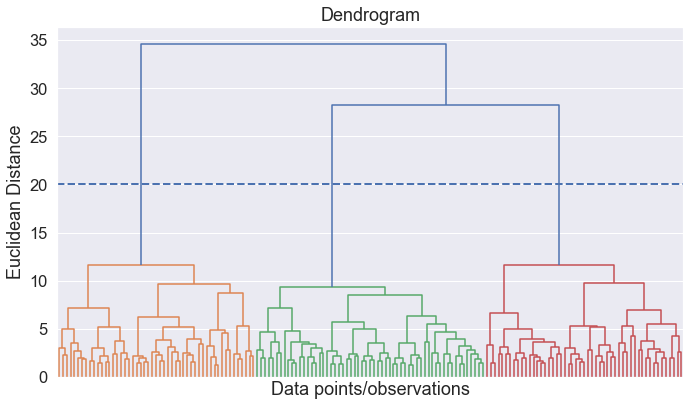

In [35]:
#Dendrogram
plt.figure(figsize=(10,6))
dendogram = sch.dendrogram(sch.linkage(scaled_data,method='ward'))
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.title('Dendrogram')
plt.hlines(y=20,xmin=0,xmax=2000,lw=2,linestyles='--')
plt.xlabel('Data points/observations')
plt.ylabel('Euclidean Distance')
plt.show()

We can take number of clusters as 3 from the dendrogram.

## Agglomerative Hierarchical clustering

In [36]:
#Lets us fit the model and predict using cluster number as 3

hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(scaled_data)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

The three clusters can be seen which are 0,1,2

Text(0.5, 1.0, 'Alcohol and Malic_Acid after Hierachical clustering')

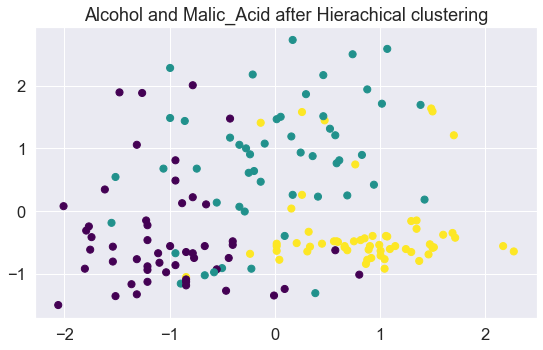

In [37]:
#Visualise the cluster formation using Alcohol and Malic_Acid as features
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=y_hc, s=50, cmap='viridis')
plt.title('Alcohol and Malic_Acid after Hierachical clustering')


### Validation Using Silhouette Score

In [38]:

sil_hc=silhouette_score(scaled_data,y_hc)
print(sil_hc)

0.29574004115878627


<AxesSubplot:title={'center':'Alcohol vs Proline'}>

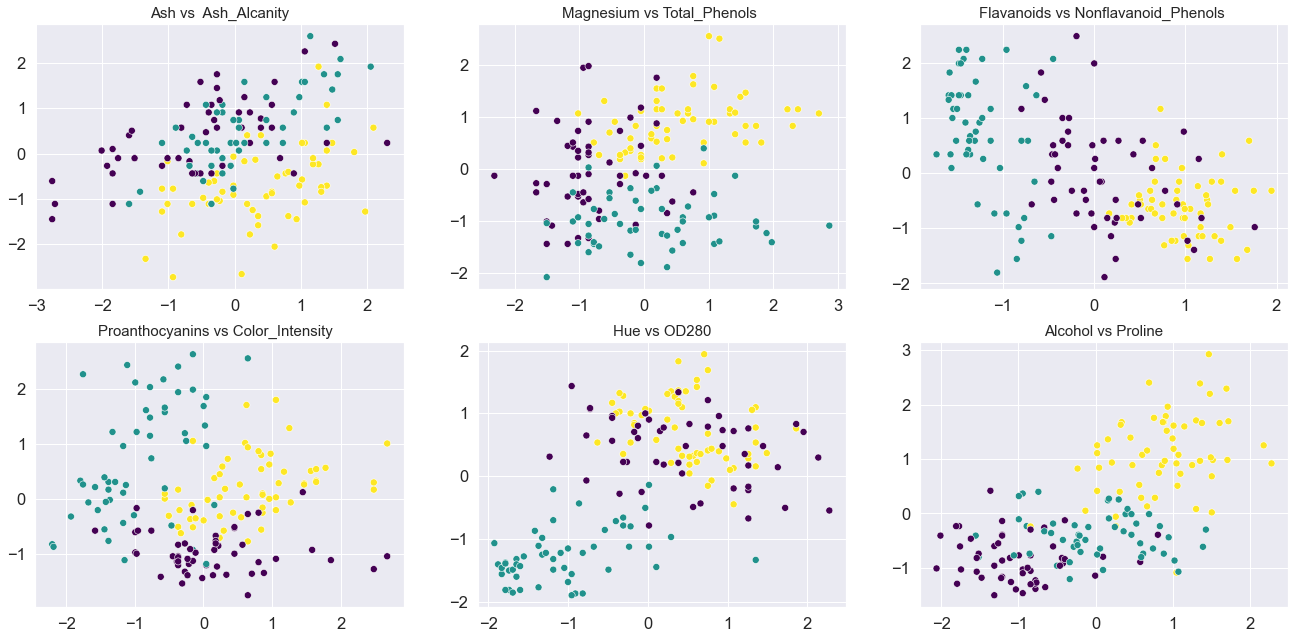

In [39]:
#Plotting all the features
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.title('Ash vs  Ash_Alcanity',fontsize=15)
sns.scatterplot(scaled_data[:, 2], scaled_data[:, 3], c=y_hc, s=50, cmap='viridis')


plt.subplot(2,3,2)
plt.title('Magnesium vs Total_Phenols ',fontsize=15)
sns.scatterplot(scaled_data[:, 4], scaled_data[:, 5], c=y_hc, s=50, cmap='viridis')


plt.subplot(2,3,3)
plt.title('Flavanoids vs Nonflavanoid_Phenols ',fontsize=15)
sns.scatterplot(scaled_data[:, 6], scaled_data[:, 7], c=y_hc, s=50, cmap='viridis')


plt.subplot(2,3,4)
plt.title('Proanthocyanins vs Color_Intensity  ',fontsize=15)
sns.scatterplot(scaled_data[:, 8], scaled_data[:, 9], c=y_hc, s=50, cmap='viridis')


plt.subplot(2,3,5)
plt.title('Hue vs OD280',fontsize=15)
sns.scatterplot(scaled_data[:, 10], scaled_data[:, 11], c=y_hc, s=50, cmap='viridis')


plt.subplot(2,3,6)
plt.title('Alcohol vs Proline',fontsize=15)
sns.scatterplot(scaled_data[:, 0], scaled_data[:, 12], c=y_hc, s=50, cmap='viridis')


## 3.Density based Model- DBSCAN

Density-Based Spatial Clustering of Applications with Noise(DBSAN) identifies discrete groups in data. The algorithm aims to cluster the data as contiguous regions having high point density. Each cluster is separated from the others by points of low density. The cluster covers the data points that fit the density criteria which is the minimum number of data objects in a given radius.

#### Finding Optimal Value of EPS (Knee Method)

The goal is to find the average of distances for every point to its K nearest neighbors and select the distance at which maximum curvature or a sharp change happens. The value of K is set to be equal to minPoints.

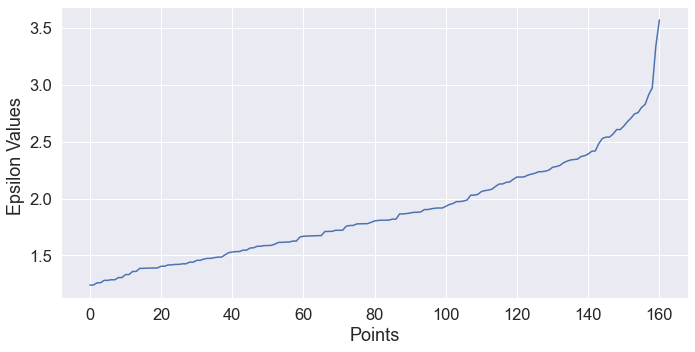

In [40]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(scaled_data)
distances, idx = nn.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Epsilon Values ")
plt.show()

We can observe a sharp change at 2.9 as eps value.

In [41]:
dbscan=DBSCAN(eps=2.9,min_samples=11)
model_1=dbscan.fit(scaled_data)
#to get labels and giving it to a variable
labels_db=model_1.labels_
labels_db
sample_cores_1=np.zeros_like(labels_db,dtype=bool)
sample_cores_1
# Setting core and border points (all points that are not -1) to True
sample_cores_1[dbscan.core_sample_indices_]=True
dbscan.core_sample_indices_
# Finding the number of clusters in labels (ignoring noise if present)
n_clusters_=len(set(labels_db))-(1 if -1 in labels_db else 0)
n_clusters_
n_noise_ = list(labels_db).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print('Silhouette score is:',silhouette_score(scaled_data,labels_db))

Estimated number of clusters: 2
Estimated number of noise points: 9
Silhouette score is: 0.21593273896221143


We got only 2 clusters.

Text(0.5, 1.0, 'Alcohol and Malic_Acid after DBSCAN')

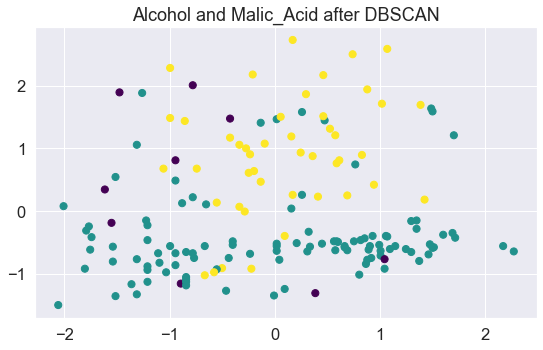

In [42]:
#Visualise the cluster formation using Alcohol and Malic_Acid as features
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_db, s=50, cmap='viridis')
plt.title('Alcohol and Malic_Acid after DBSCAN')


We can see 2 clusters and noise as outliers

<AxesSubplot:title={'center':'Alcohol vs Proline'}>

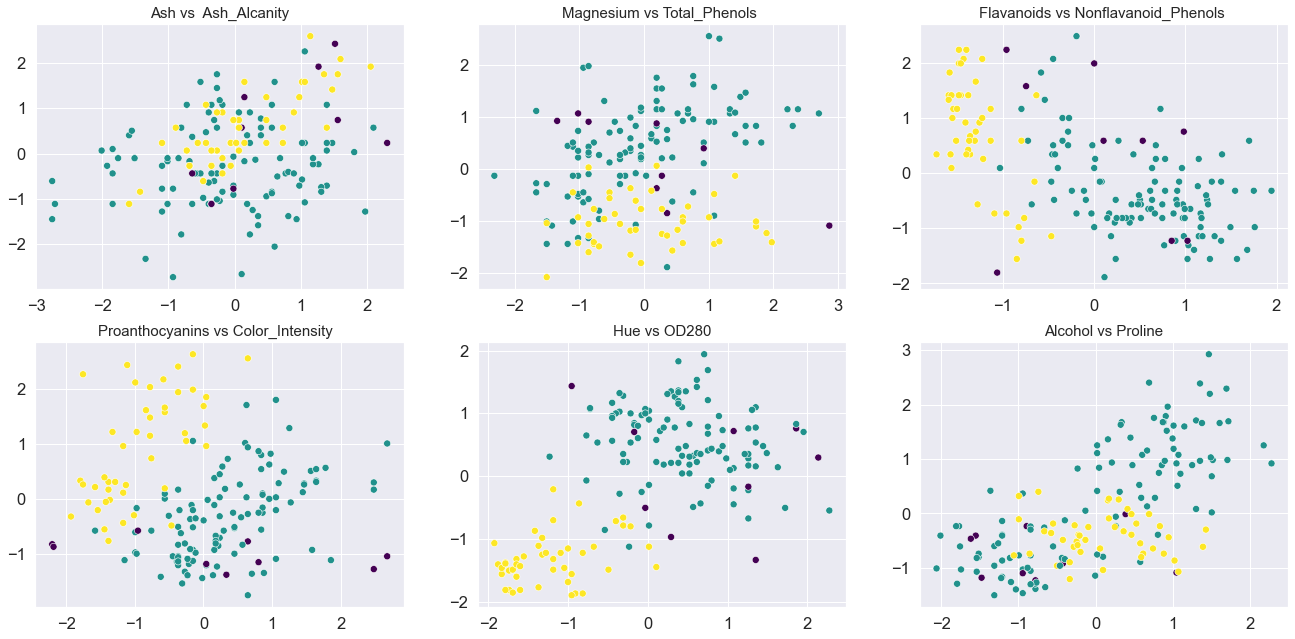

In [43]:
#Plotting all the features
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.title('Ash vs  Ash_Alcanity',fontsize=15)
sns.scatterplot(scaled_data[:, 2], scaled_data[:, 3], c=labels_db, s=50, cmap='viridis')


plt.subplot(2,3,2)
plt.title('Magnesium vs Total_Phenols ',fontsize=15)
sns.scatterplot(scaled_data[:, 4], scaled_data[:, 5], c=labels_db, s=50, cmap='viridis')


plt.subplot(2,3,3)
plt.title('Flavanoids vs Nonflavanoid_Phenols ',fontsize=15)
sns.scatterplot(scaled_data[:, 6], scaled_data[:, 7], c=labels_db, s=50, cmap='viridis')


plt.subplot(2,3,4)
plt.title('Proanthocyanins vs Color_Intensity  ',fontsize=15)
sns.scatterplot(scaled_data[:, 8], scaled_data[:, 9], c=labels_db, s=50, cmap='viridis')


plt.subplot(2,3,5)
plt.title('Hue vs OD280',fontsize=15)
sns.scatterplot(scaled_data[:, 10], scaled_data[:, 11], c=labels_db, s=50, cmap='viridis')


plt.subplot(2,3,6)
plt.title('Alcohol vs Proline',fontsize=15)
sns.scatterplot(scaled_data[:, 0], scaled_data[:, 12], c=labels_db, s=50, cmap='viridis')


### Validation Using Silhouette score

In [44]:
sil_avg=silhouette_score(scaled_data,labels_db)
print(sil_avg)

0.21593273896221143


# Principal Component Analysis(PCA)

The Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of data. It increases interpretability yet, at the same time, it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D.

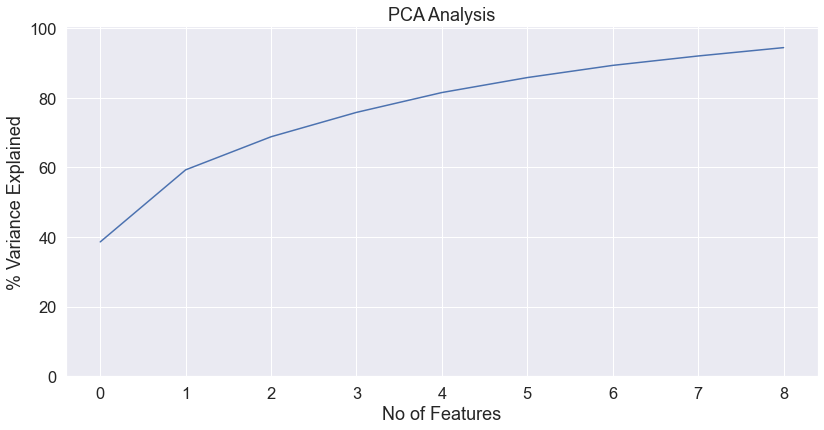

In [45]:
pca = PCA(n_components=9)
pca.fit(scaled_data)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('No of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)
plt.show()

In [46]:
#Reducing to 2 dimension
pca=PCA(n_components=2)
reduced_data=pd.DataFrame(pca.fit_transform(scaled_data),columns=['PC1','PC2'])
reduced_data

,PC1,PC2
0,-3.503528,-1.609446
1,-2.342642,0.331164
2,-2.661349,-0.936183
3,-3.925301,-2.710827
4,-1.032831,-1.074396
...,...,...
156,2.405826,-2.242187
157,2.642860,-1.932660
158,2.656031,-3.179693
159,2.354087,-2.646939


In [47]:
#Correlation after PCA
reduced_data.corr().round(2)

,PC1,PC2
PC1,1.0,0.0
PC2,0.0,1.0


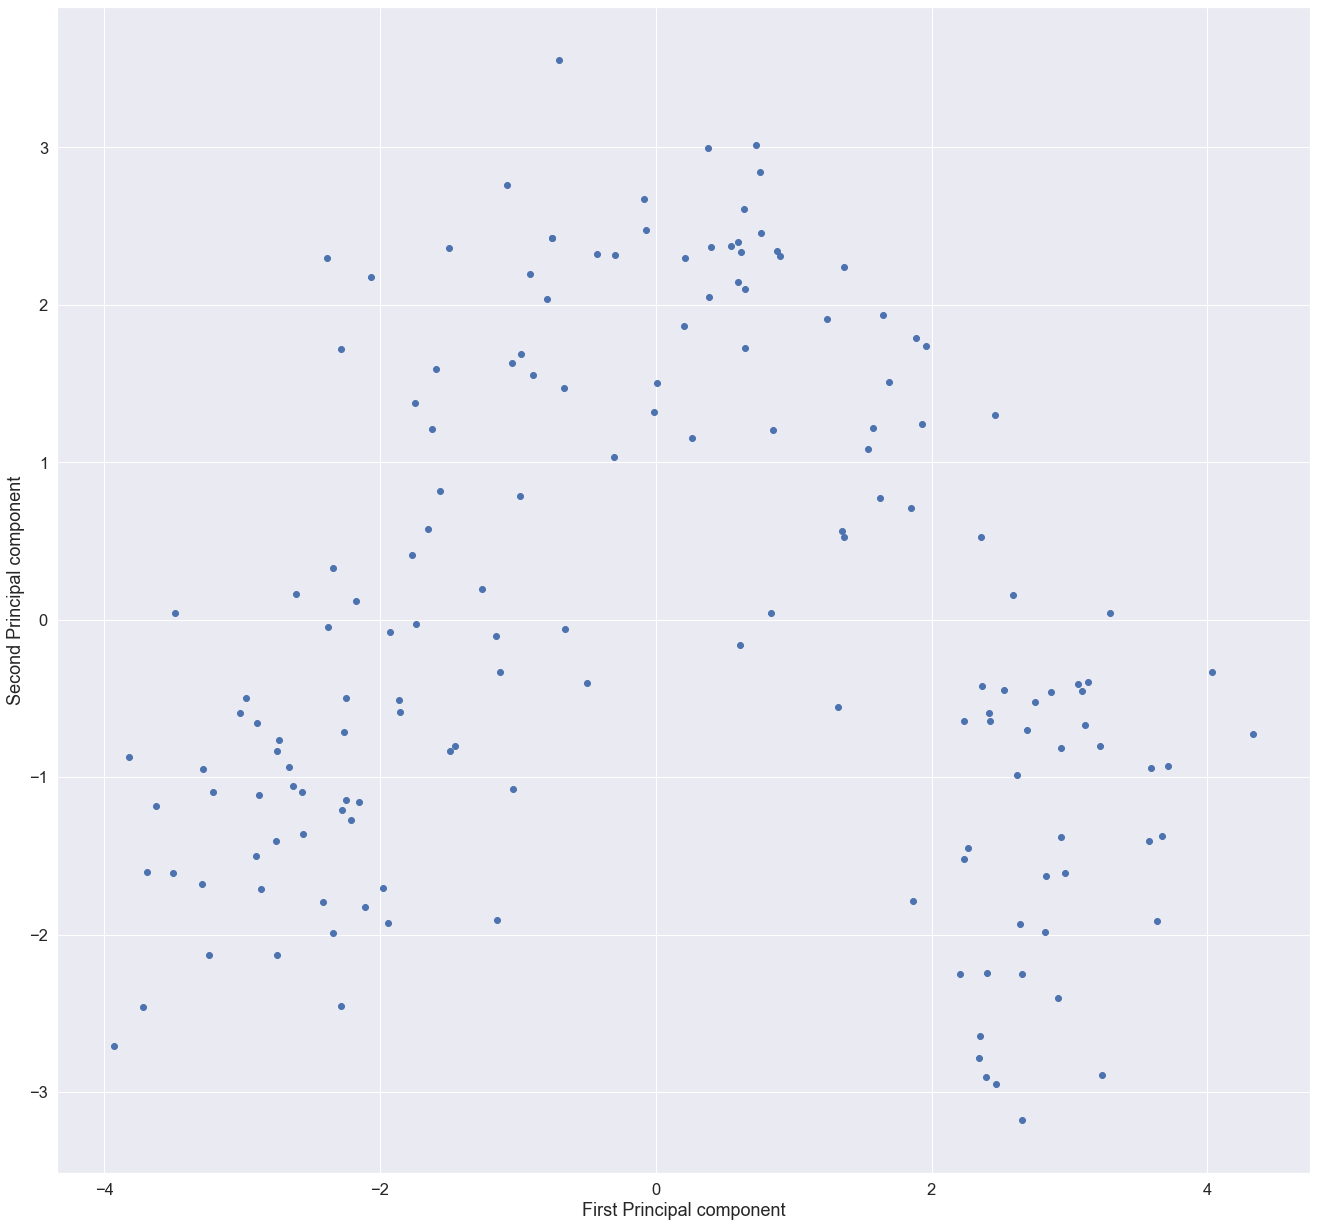

In [48]:
#plotting PC1 and PC2
plt.scatter(reduced_data['PC1'],reduced_data['PC2'])
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')
plt.show()

In [49]:
#Adding clusters of Kmeans,Hierarchical and DBSCAN
reduced_data['cluster_km']=y_kmeans
reduced_data['cluster_hc']=y_hc
reduced_data['cluster_db']=labels_db
reduced_data

,PC1,PC2,cluster_km,cluster_hc,cluster_db
0,-3.503528,-1.609446,2,2,0
1,-2.342642,0.331164,2,2,0
2,-2.661349,-0.936183,2,2,0
3,-3.925301,-2.710827,2,2,0
4,-1.032831,-1.074396,2,2,0
...,...,...,...,...,...
156,2.405826,-2.242187,1,1,1
157,2.642860,-1.932660,1,1,1
158,2.656031,-3.179693,1,1,1
159,2.354087,-2.646939,1,1,1


## KMeans after PCA

In [50]:
#Before PCA kmeans cluster centroids were
centers

array([[-0.96015895, -0.45028168, -0.43682141,  0.29927164, -0.60697184,
        -0.06283865,  0.04141528,  0.00250436,  0.04315225, -0.94144898,
         0.47928609,  0.28721177, -0.781647  ],
       [ 0.09364475,  0.92851635,  0.14564118,  0.59003002,  0.01205784,
        -1.01829457, -1.25446575,  0.73316896, -0.88073777,  0.90214474,
        -1.18465143, -1.30290758, -0.41983547],
       [ 0.90143089, -0.29114763,  0.32694995, -0.7806866 ,  0.60788958,
         0.88572266,  0.97023401, -0.59422851,  0.66686153,  0.229919  ,
         0.46833986,  0.7592187 ,  1.13417469]])

More than 3 dimension

In [51]:
#After PCA
reduced_centers=pca.transform(centers)
reduced_centers

array([[ 0.13325771,  1.86085793],
       [ 2.78503972, -1.17818356],
       [-2.38317148, -0.94268976]])

After PCA it has reduced to 2 dimension.

### Validataion using Siluette score after PCA

In [52]:
#For Kmeans clustering
sil_km_pca=silhouette_score(reduced_data,y_kmeans)
sil_km_pca

0.6314681364757021

In [53]:
#For Hierarchical Clustering
sil_hc_pca=silhouette_score(reduced_data,y_hc)
sil_hc_pca

0.6098933314271815

In [54]:
#For DBSCAN
sil_db_pca=silhouette_score(reduced_data,labels_db)
sil_db_pca

0.21843783362655766

Kmeans have good score and clustered well whereas DBSCAN needs imporvement.

## Visualization of KMeans clusters after PCA


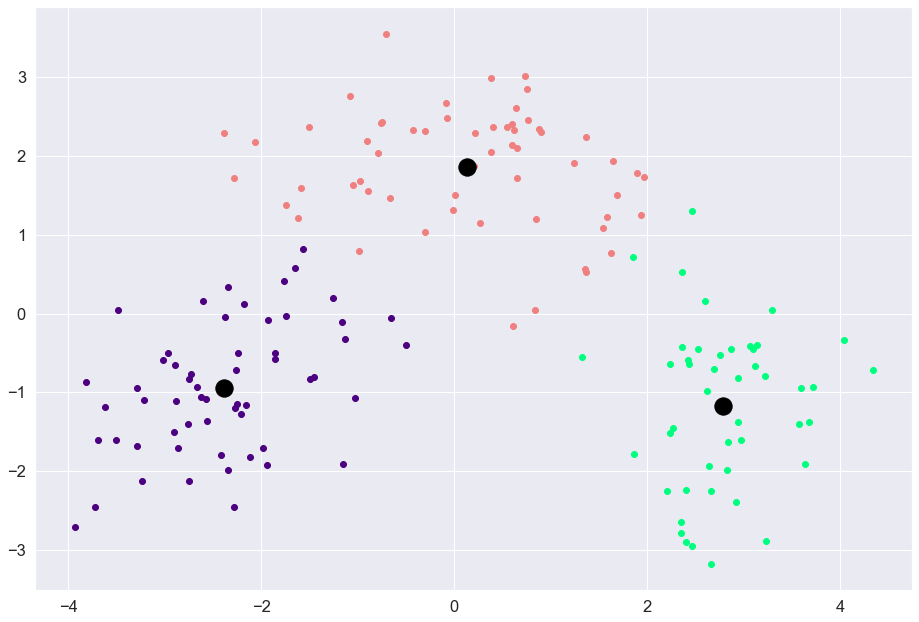

In [55]:
plt.figure(figsize=(14,10))

plt.scatter(reduced_data[reduced_data['cluster_km']==0].loc[:,'PC1'],reduced_data[reduced_data['cluster_km']==0].loc[:,'PC2'],color='lightcoral')
plt.scatter(reduced_data[reduced_data['cluster_km']==1].loc[:,'PC1'],reduced_data[reduced_data['cluster_km']==1].loc[:,'PC2'],color='springgreen')
plt.scatter(reduced_data[reduced_data['cluster_km']==2].loc[:,'PC1'],reduced_data[reduced_data['cluster_km']==2].loc[:,'PC2'],color='indigo')

plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='o',s=300)
plt.show()

## Visualization of Hierarchical Clustering after PCA

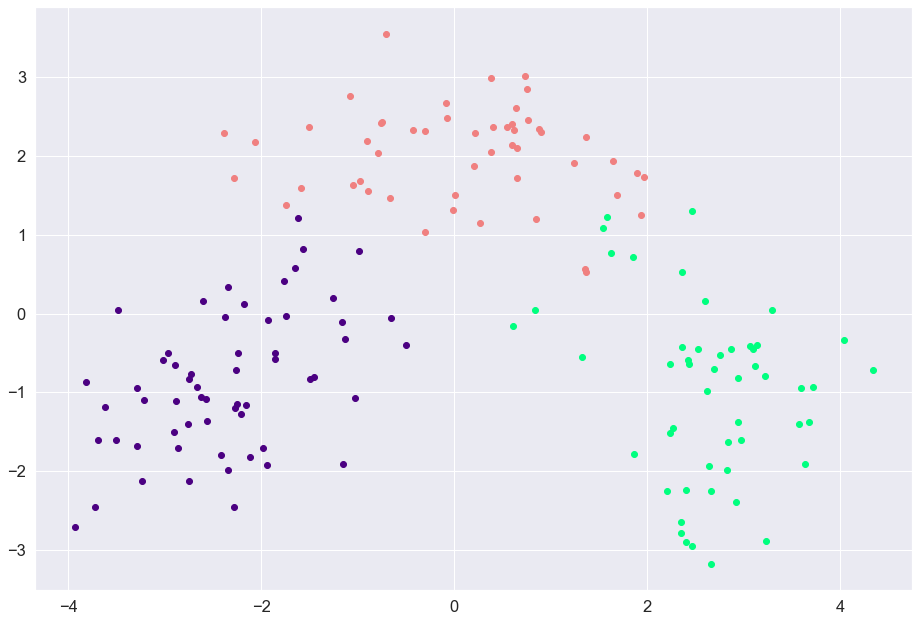

In [56]:
plt.figure(figsize=(14,10))

plt.scatter(reduced_data[reduced_data['cluster_hc']==0].loc[:,'PC1'],reduced_data[reduced_data['cluster_hc']==0].loc[:,'PC2'],color='lightcoral')
plt.scatter(reduced_data[reduced_data['cluster_hc']==1].loc[:,'PC1'],reduced_data[reduced_data['cluster_hc']==1].loc[:,'PC2'],color='springgreen')
plt.scatter(reduced_data[reduced_data['cluster_hc']==2].loc[:,'PC1'],reduced_data[reduced_data['cluster_hc']==2].loc[:,'PC2'],color='indigo')


## Visualization of DBSCAN clustering after PCA

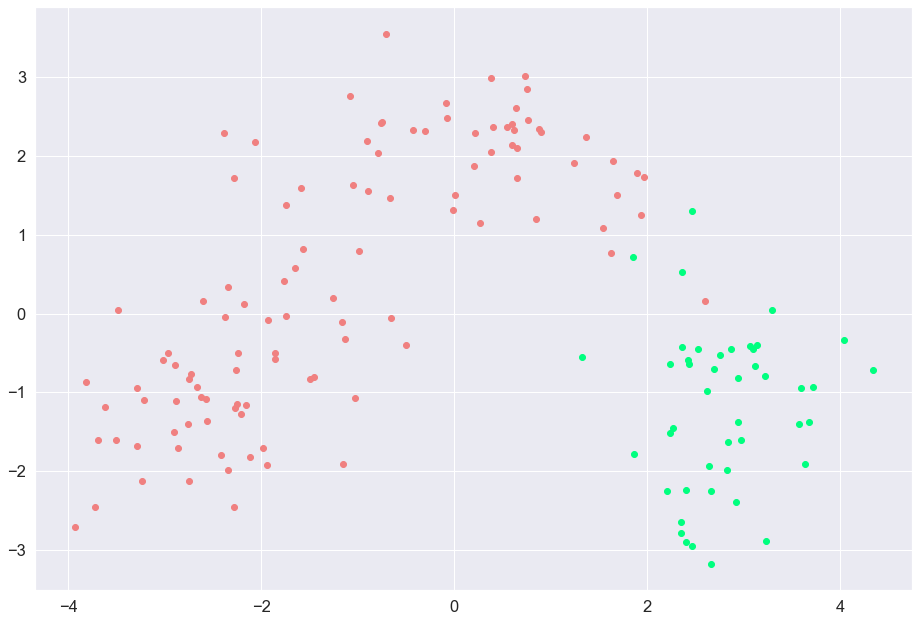

In [57]:
plt.figure(figsize=(14,10))

plt.scatter(reduced_data[reduced_data['cluster_db']==0].loc[:,'PC1'],reduced_data[reduced_data['cluster_db']==0].loc[:,'PC2'],color='lightcoral')
plt.scatter(reduced_data[reduced_data['cluster_db']==1].loc[:,'PC1'],reduced_data[reduced_data['cluster_db']==1].loc[:,'PC2'],color='springgreen')
plt.scatter(reduced_data[reduced_data['cluster_db']==2].loc[:,'PC1'],reduced_data[reduced_data['cluster_db']==2].loc[:,'PC2'],color='indigo')


## Insights

From Clustering without PCA and with PCA, it is clear that the models are clustered into 3 for both KMeans & Hierarchial Clustering and 2 clusters using DBSCAN clustering. Therefore there are 3 category of wines with KMeans & Hierarchial Clustering model.With Kmeans having better score than other 2 we can confirm the best clustering for this dataset is KMeans clustering Model.With PCA we got better score in all three types of clustering.